In [49]:
import Pkg;
Pkg.activate("../")
Pkg.instantiate()
Pkg.add(url = "https://github.com/RalphAS/Pseudospectra.jl")

  Activating project at `~/Code/ExperimentsPseudospectra.jl/notebook`
    Updating git-repo `https://github.com/RalphAS/Pseudospectra.jl`
   Resolving package versions...
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Manifest-v1.11.toml`


In [50]:
using Pseudospectra, Plots

In [51]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


# Our example

We start by defining the Blashke product 
$$
B_{\mu}(z) = \frac{z (\mu - z)} {1 - \bar{\mu} z},
$$
with $\mu = \frac{17\sqrt{2}}{32} e^{i \pi/8}$.

In [52]:
r = sqrt(2)*15/32 
ϕ = π / 8

max_r = 10.0
μ = r * exp(im * ϕ)
B(z; μ=μ) = (z * (μ - z)) / (1 - μ' * z)

B (generic function with 1 method)

# Non rigorous exploration of the Pseudospectrum

We fix the truncation size for the Galerkin approximation.

In [53]:
K = 128
N = 2*K+1

257

We start by writing the Blashke product as an interval map

In [54]:
S(x) = 0.5 + atan((sin(2 * pi * x) - r * sin(ϕ)) / (cos(2 * pi * x) - r * cos(ϕ))) / pi

S (generic function with 1 method)

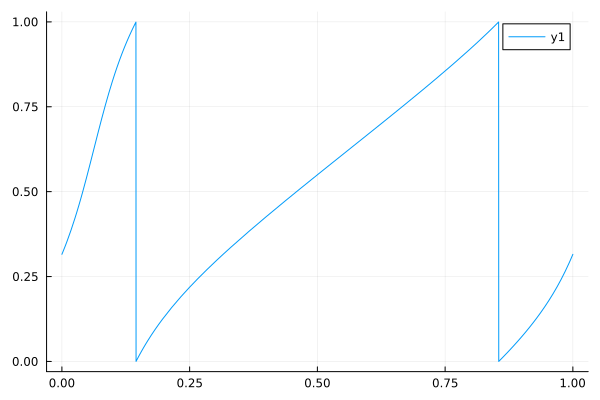

In [55]:
using Plots
plot(S, 0, 1)

In [56]:
using RigorousInvariantMeasures
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 65536)
P = DiscretizedOperator(FourierBasis, S)

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/GenericAssembler.jl:145
┌ Info: 257
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 128
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


NonIntegralPreservingDiscretizedOperator{LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Matrix{Complex{Interval{Float64}}}}, Vector{Float64}, LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Vector{Complex{Interval{Float64}}}}}(Complex{Interval{Float64}}[[0.999999, 1.00001] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im … [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im; [-2.52445e-14, 2.51402e-14] + [-2.51573e-14, 2.52274e-14]im [0.612451, 0.612452] + [-0.253686, -0.253685]im … [-2.51654e-14, 2.52193e-14] + [-2.51754e-14, 2.52093e-14]im [-2.51889e-14, 2.51958e-14] + [-2.51749e-14, 2.52098e-14]im; … ; [-2.67071e-14, 2.66231e-14] + [-2.66345e-14, 2.66958e-14]im [-2.66537e-14, 2.66765e-14] + [-2.66188e-14, 2.67114e-14]im … [0.31074, 0.310741] + [0.31074, 0.310741]im [-2.67202e-14, 2.661e-14] + [-2.66736e-14, 2.66566e-14]im; [-2.52445e-14, 2.51402e-14] + [-2.52274e-14, 2

Computing pseudospectra... 100%|████████████████████| Time: 0:00:02


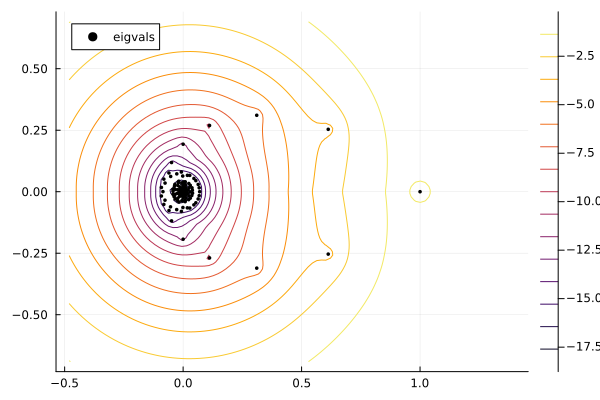

In [57]:
import IntervalArithmetic
midI = IntervalArithmetic.mid
radI = IntervalArithmetic.radius

midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))
spectralportrait(midP)

# Numerical oracle for the constants

In this section we do some numerical computations to narrow down the set of parameters. Later on, we will use self-validated numerical methods (Interval Arithmetic) to certify the 
numerical values we computed now. We do this since numerical computations are inexpensive, while self validated methods may be more time-consuming.

In [58]:
using Plots

In [59]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


Let $A_{r} = \{z \mid e^{-2\pi r}\leq |z| \leq e^{2\pi r}\}$.

We are interested in finding $\eta$, $\rho$ such that the closure $A_{\rho}$ is contained in $B_{\mu}(A_{\eta})$.
We are interested in maximizing $\alpha-\eta$, since it is the constant appearing in the main error term of our functional analytic treatment, i.e.:
$$
||Lf-L_Kf||_{\mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho-\alpha)}-1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\mathcal{A}_{\alpha}}.	
$$

For $\eta>1$ fix
$$
\rho_o(\eta):=\frac{1}{2\pi}\log\left(\min_{\theta \in [0,1]}|B_{\mu}(e^{2\pi\eta} e^{2\pi i \theta})|\right)
$$
where $_0$ stays for outer.
We would like to maximize this function.

In [60]:
ρ_o(η) = log(minimum(abs.(B.([exp(2 * π*(η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_o (generic function with 1 method)

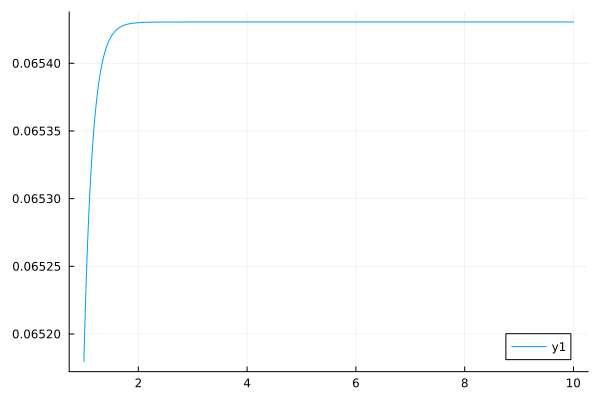

In [61]:
plot(η->ρ_o(η)-η, 1, 10)

Similarly, we would like to treat the image inside the circle; for $\eta>1$ we define 
$$
\rho_i(\eta) :=-\frac{1}{2\pi}\log\left(\max_{\theta \in [0, 1]}\left|B_{\mu}(e^{2\pi (-\eta + i \theta)})\right|\right)
$$

In [62]:
ρ_i(η) = -log(maximum(abs.(B.([exp(2 * π*(-η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_i (generic function with 1 method)

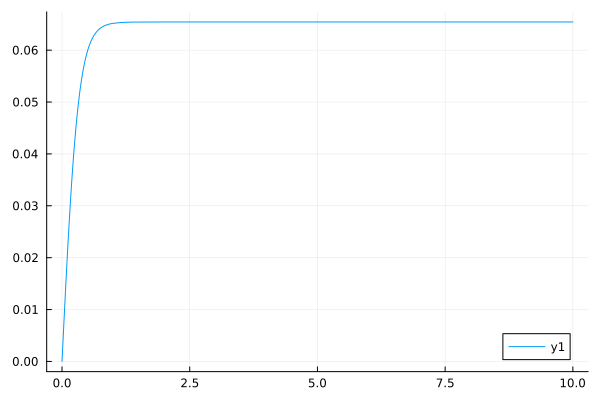

In [63]:
plot(η->ρ_i(η)-η, 0, 10)

We define now 
$$
\rho(\eta) = \min\{\rho_i(\eta),\rho_o(\eta)\}-\eta
$$
we have that our dynamic is expanding the annulus when this function is positive.

In [64]:
ρ(η) = min(ρ_i(η), ρ_o(η))

ρ (generic function with 1 method)

We plot now the function 
$$
    \eta \mapsto \rho(\eta)-\eta
$$
our dynamic is expanding the annulus when this function is positive.

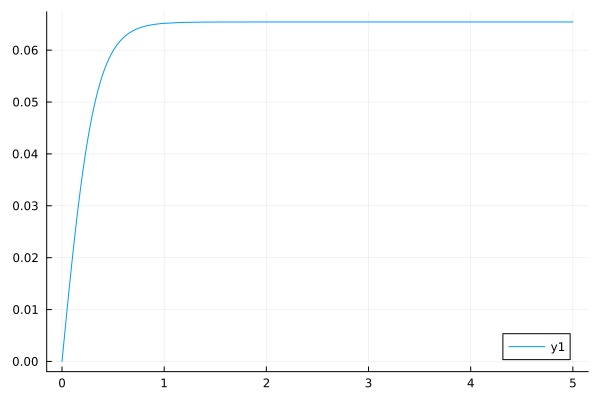

In [65]:
plot(η -> (ρ(η)-η), 0, 5)

From this non certified plot, we can see that the the difference $\rho(\eta)-\eta$ seems to converge to an asymptotic value bigger than 
$0.04551$.

We need now to be careful in choosing $\eta$ and $\rho$ in such a way that our computation is well behaved.

By our numerical exploration of the pseudospectrum, we want to isolate the eigenvalues outside of a circle of radius $0.5$.

By Lemma 3.10 and Lemma 3.13, we have that 
$$
\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}}\leq 2^{\frac{\alpha}{\alpha-\eta}} \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)^{\frac{\alpha}{\alpha-\eta}} 
$$
and
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right).
$$

We refer to Proposition 2 in the paper, what we would like to control and make small is
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}};
$$
since $\rho>\alpha$ we have then that $\alpha-\eta$ is at most $0.04551$.

To optimize this, we pass to the logarithm.

In [66]:
bound(η, ρ, α; K, μ) =  α/(α-η)*log2(1/μ)+(α/(α-η)+1)*log2(1+2/(exp(2*π*(ρ-α))-1))+log2(exp(-2*π*K*α)+exp(-2*π*K*(α-η)))

bound (generic function with 1 method)

In [67]:
bound_η_α(η, α; K, μ) = bound(η, ρ(η), α; K, μ)

bound_η_α (generic function with 1 method)

In [68]:
function bound_η(η; K, μ)
    η_eps = η+(ρ(η)-η)/100
    ρ_eps = ρ(η)-(ρ(η)-η)/100
    val, index = findmin([bound_η_α(η, α; K, μ) for α in LinRange(η_eps, ρ_eps, 100)])
    return val, LinRange(η_eps, ρ_eps, 100)[index]
end

bound_η (generic function with 1 method)

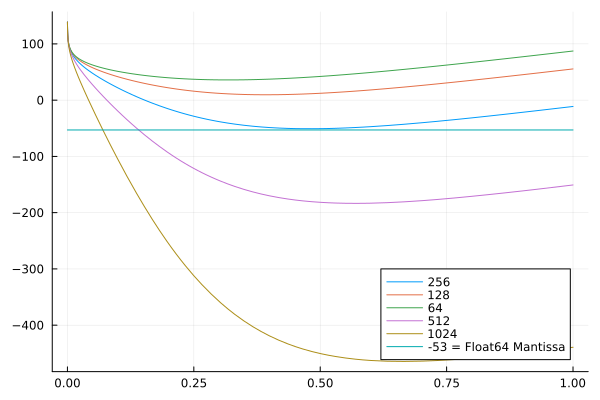

In [69]:
xmin = 0.0
xmax = 1.0
plot(η -> bound_η(η; K = 256, μ = 1/2)[1], xmin, xmax, label = "256")
plot!(η -> bound_η(η; K = 128, μ = 1/2)[1], xmin, xmax, label = "128")
plot!(η -> bound_η(η; K = 64, μ = 1/2)[1], xmin, xmax, label = "64")
plot!(η -> bound_η(η; K = 512, μ = 1/2)[1], xmin, xmax, label = "512")
plot!(η -> bound_η(η; K = 1024, μ = 1/2)[1], xmin, xmax, label = "1024")
plot!(η -> -53, label = "-53 = Float64 Mantissa")

We choose a discretization size of $K=256$. For this discretization size we fix $\eta = 0.52865$

In [70]:
steps = 200
val, index = findmin([bound_η(η; K = 256, μ = 1/2)[1] for η in LinRange(0.25, 0.5, steps)])

(-50.82889520688042, 183)

In [79]:
chosen_η = LinRange(0.2, 0.5, steps)[index]
chosen_α = bound_η(chosen_η; K = 256, μ = 1/2)[2]

0.5286519287136376

By Proposition 3.14, we have that the eigenvalues of modulus bigger than $1/2$ of $\mathcal{L}$ are contained 
in $\sigma_\delta$ for all $\delta\geq 2^{-65}$, where 
$$
\sigma_{\delta} = \sigma(\mathcal{L_K})\cup \{z \in \mathbb{C} \mid z-\mathcal{L}_K\textrm{ is bounded invertible and } |(z-\mathcal{L}_K)^{-1}|> \delta^{-1}|\}
$$

# Certifying the constants

For the specific values of $\alpha$, $\rho$ and $\eta$ computed above, we will certify the value of the constants.

We will repeat the process above to estimate $\rho$, by enclosing the image of the annulus of radius $2\pi\eta$, by using now interval arithmetic to 
obtain guaranteed enclosures.

In [80]:
N = 32768
IΘ = [Interval(i, i+1)/N for i in 0:N-1];

In [81]:
ρ_o_c(η; IΘ) = log(minimum(abs.(B.([exp(2 * π*(η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_i_c(η; IΘ) = -log(maximum(abs.(B.([exp(2 * π*(-η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_c(η; IΘ) = min(ρ_i_c(η; IΘ), ρ_o_c(η; IΘ))

ρ_c (generic function with 1 method)

For the chosen $\eta$ we have that our oracle for $\rho$ returns

In [82]:
ρ(chosen_η)

0.5333266247632774

The certificate $\rho$ has some overestimates, but we can make this error small by taking a big partition $I\Theta$

In [83]:
ρ_certified = Interval((ρ_c(chosen_η; IΘ)).lo) 

[0.533264, 0.533265]

After all computations, our chosen $\alpha$, $\eta$ and certified $\rho$ are

In [84]:
chosen_η, ρ_certified, chosen_α

(0.4743718592964824, [0.533264, 0.533265], 0.5286519287136376)

And the certified bound is 

In [85]:
δ = 2^bound(Interval(chosen_η), ρ_certified, Interval(chosen_α); K = 512, μ = 1/2)

[6.98961e-54, 6.98962e-54]